In [77]:
import torch 
from torch import nn,optim 
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from statistics import mean
import matplotlib.pyplot as plt

In [78]:
t = transforms.ToTensor()
data = MNIST(root='./data', train=True, transform=t, download=True)
print(data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [79]:
class Encoder(nn.Module):

    def __init__(self):
        super(Encoder,self).__init__()
        self.encode1 = nn.Linear(784,196)
        self.bnorm1 = nn.BatchNorm1d(196)

        self.encode2 = nn.Linear(196,49)
        self.bnorm2 = nn.BatchNorm1d(49)

        self.decode1 = nn.Linear(49,196)
        self.decode2 = nn.Linear(196,784)

    def forward(self,x):
        x = self.bnorm1(self.encode1(x))
        x = self.bnorm2(self.encode2(x))
        x = self.bnorm1(self.decode1(x))
        return self.decode2(x)

In [80]:
epochs = 25
batch_size = 100
lr = 0.015
momentum = 0.8
show_every = 50

model = Encoder()
loader = DataLoader(dataset = data, batch_size = batch_size, shuffle = True)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
loss_fn = nn.MSELoss()

loss_list = []
all_loss = []
for epoch in range(epochs):
    temp_loss = []
    batch_counter = 0

    for x,y in loader :
        opt.zero_grad()
        x = torch.flatten(x, start_dim=1)
        yhat = model.forward(x)
        loss = loss_fn(yhat,x)

        temp_loss.append(loss.item())
        all_loss.append(loss.item())

        loss.backward()
        opt.step()

        if batch_counter % show_every == 0 : 
            print(f'{batch_counter} --> ', end='', flush=True)

        batch_counter += 1

    mean_loss = mean(temp_loss)
    loss_list.append(mean_loss)

    print()
    print(f'Epoch : {epoch} | Loss : {mean_loss}')
    print('-' * 50)

0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 0 | Loss : 0.13151975367218255
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 1 | Loss : 0.07700783912092447
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 2 | Loss : 0.06278861827527484
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 3 | Loss : 0.051717835416396456
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 4 | Loss : 0.045141653517882026
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 5

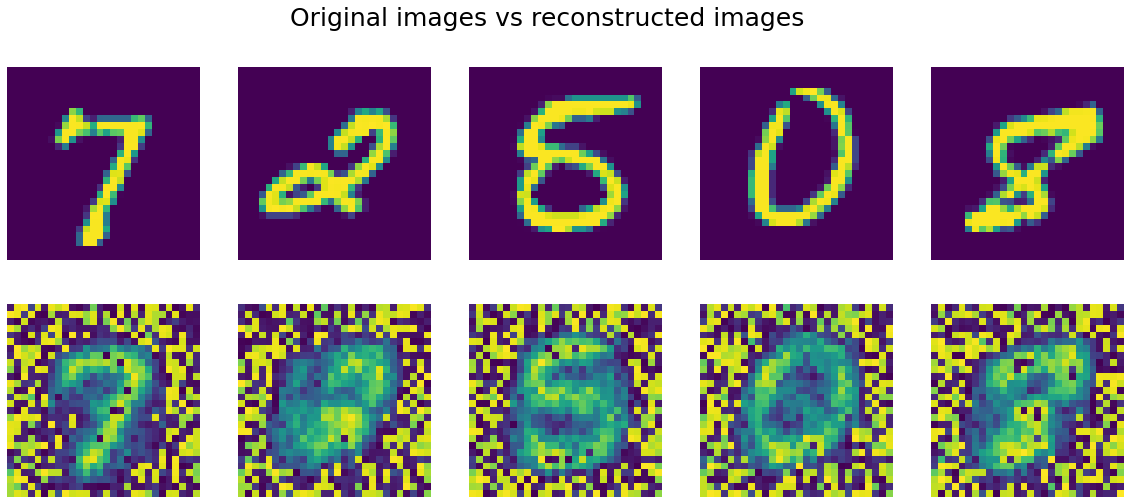

In [113]:
img_indexes = torch.randint(low = 0, high = len(data), size = (5,))
fig,ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20,8))
trans = transforms.ToPILImage()
fig.suptitle('Original images vs reconstructed images', size = 25)

for i in range(len(img_indexes)):
    display_img = trans(data[img_indexes[i]][0])
    ax[0][i].imshow(display_img)
    ax[0][i].axis(False)

    model_input = data[img_indexes[i]][0]
    yhat = model.forward(torch.flatten(model_input, start_dim = 1))
    yhat = yhat.reshape((1,28,28))
    yhat = trans(yhat)
    ax[1][i].imshow(yhat)
    ax[1][i].axis(False)